<a href="https://colab.research.google.com/github/dss243/PRODIGY_ML_2/blob/master/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
data =  pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data = data.dropna()

In [ ]:
X = data[[ 'Age', 'Spending Score (1-100)', 'Annual Income (k$)']]

In [ ]:
X

,Age,Spending Score (1-100),Annual Income (k$)
0,19,39,15
1,21,81,15
2,20,6,16
3,23,77,16
4,31,40,17
...,...,...,...
195,35,79,120
196,45,28,126
197,32,74,126
198,32,18,137


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

<ipython-input-17-d5963b56b2f9>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


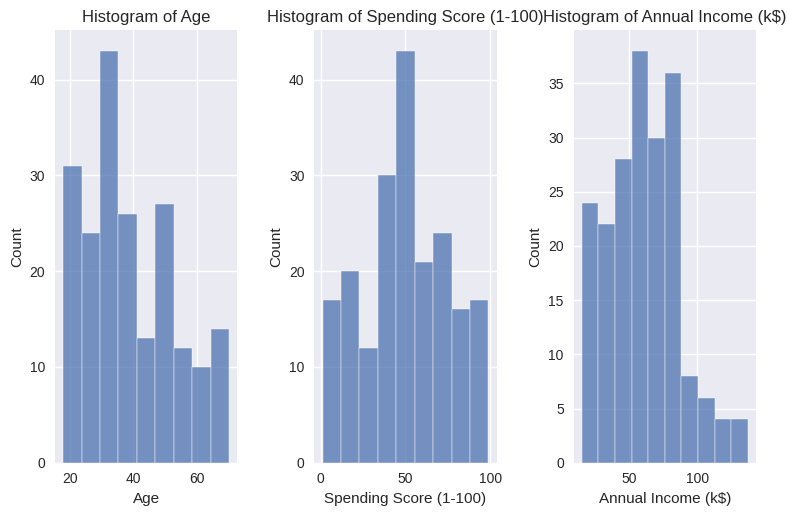

In [ ]:
fig, axs = plt.subplots(1, 3)

axs = axs.ravel()

for i, col in enumerate(X.columns):

    sns.histplot(X[col], ax=axs[i])


    axs[i].set_title('Histogram of ' + col)


plt.tight_layout()
plt.show()

In [ ]:
X.isnull().sum()

,0
Age,0
Spending Score (1-100),0
Annual Income (k$),0


In [ ]:
X.corr()


,Age,Spending Score (1-100),Annual Income (k$)
Age,1.000000,-0.327227,-0.012398
Spending Score (1-100),-0.327227,1.000000,0.009903
Annual Income (k$),-0.012398,0.009903,1.000000


In [ ]:
data[data['Gender']=='Male']['Age'].describe()


,Age
count,88.000000
mean,39.806818
std,15.514812
min,18.000000
25%,27.750000
50%,37.000000
75%,50.500000
max,70.000000


In [ ]:
data[data['Gender']=='Female']['Age'].describe()

,Age
count,112.000000
mean,38.098214
std,12.644095
min,18.000000
25%,29.000000
50%,35.000000
75%,47.500000
max,68.000000


In [ ]:
import matplotlib.pyplot as plt

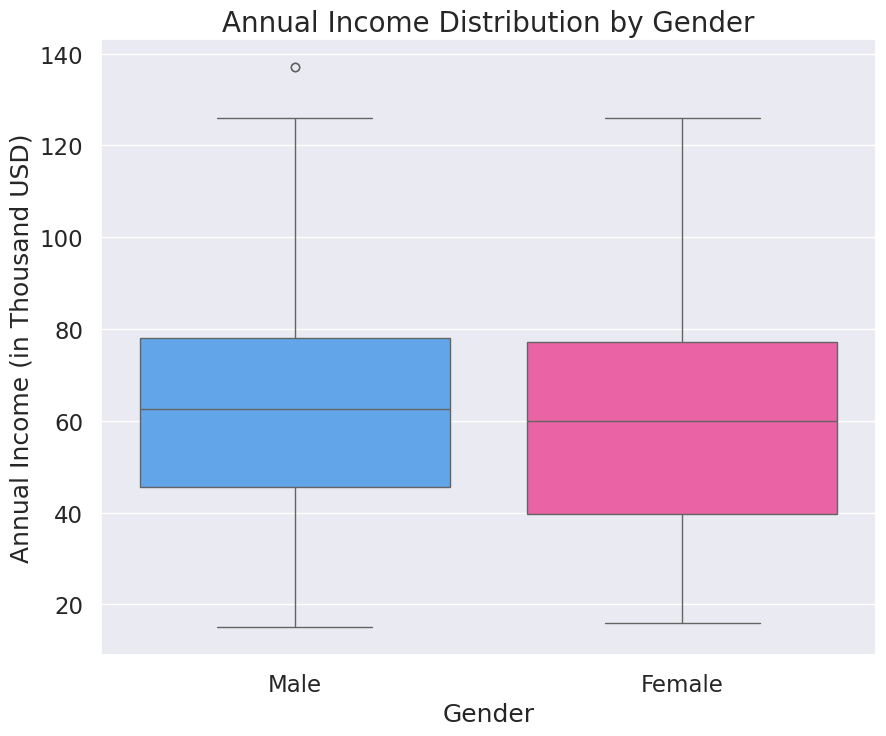

In [ ]:

custom_palette = {'Male': '#4da5ff', 'Female': '#ff4da5'}

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))
sns.set(font_scale=1.5)
ax = sns.boxplot(x=data['Gender'], y=data["Annual Income (k$)"], hue=data['Gender'], palette=custom_palette)

ax.set_ylabel('Annual Income (in Thousand USD)')

plt.title('Annual Income Distribution by Gender', fontsize=20)

plt.show()

In [ ]:
data['Spending Score (1-100)'].describe()

,Spending Score (1-100)
count,200.000000
mean,50.200000
std,25.823522
min,1.000000
25%,34.750000
50%,50.000000
75%,73.000000
max,99.000000


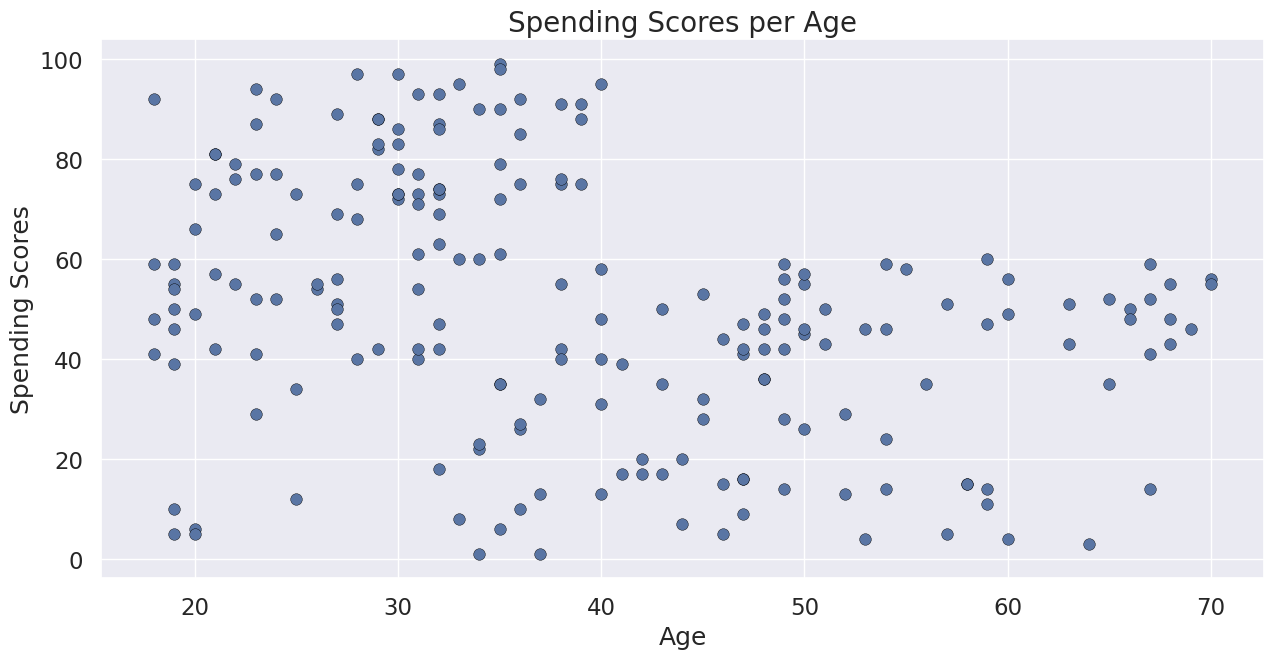

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=data['Spending Score (1-100)'], x=data['Age'], s=70, color='#5975A4', edgecolor='black', linewidth=0.3)
ax.set_ylabel('Spending Scores')

plt.title('Spending Scores per Age', fontsize = 20)
plt.show()

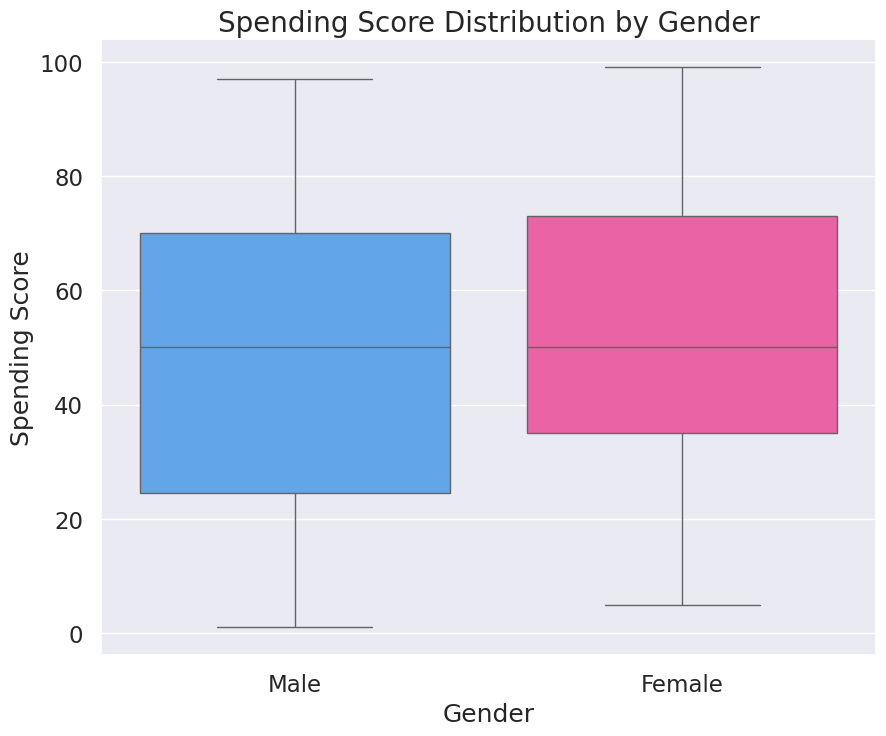

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(x=data['Gender'], y=data["Spending Score (1-100)"], hue=data['Gender'], palette=custom_palette)
ax.set_ylabel('Spending Score')

plt.title('Spending Score Distribution by Gender', fontsize = 20)
plt.show()

In [ ]:
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [ ]:
from sklearn.cluster import KMeans

In [ ]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [ ]:
!pip install kneed


In [ ]:
from kneed import KneeLocator

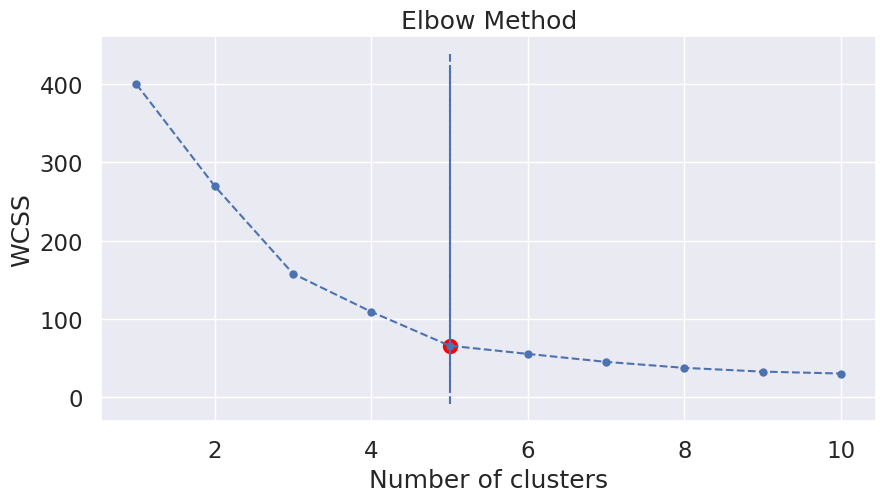

In [ ]:
# Plot the elbow method result
#method is used to determine the optimal number of clusters by plotting the WCSS for different numbers of clusters
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

#determine the optimal number of clusters in a dataset using the KMeans clustering algorithm.
knee = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
plt.vlines(knee.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.scatter(knee.knee, wcss[knee.knee - 1], color='red', s=100)
#which is 5
# plot the knee location
plt.vlines(knee.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.scatter(knee.knee, knee.knee_y, color='red', s=30)

plt.show()

In [ ]:
# Apply K-means clustering with the optimal number of clusters
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
kmeans

KMeans(n_clusters=5, random_state=42)

In [ ]:
data['Cluster'] = clusters

In [ ]:
means = KMeans(n_clusters=5)
y_means = means.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


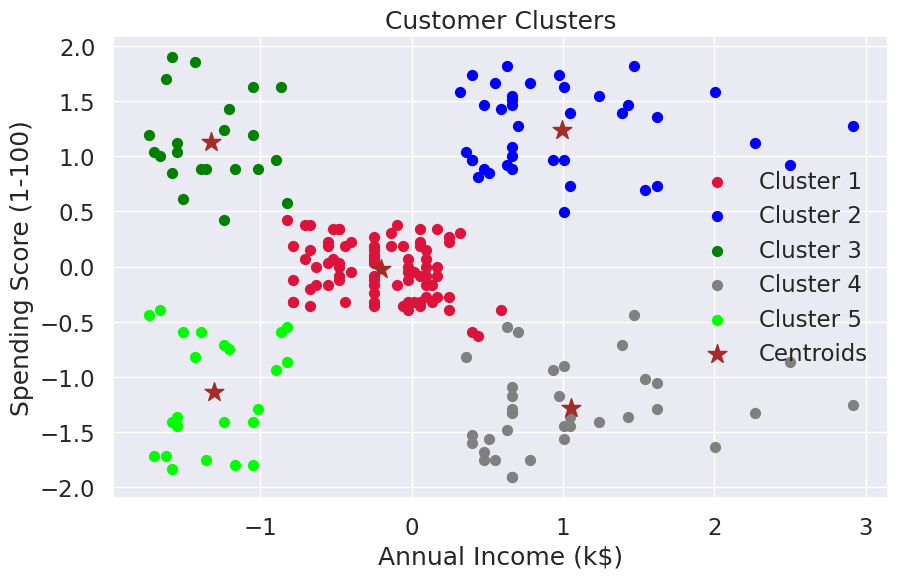

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[clusters == 0, 0], X_scaled[clusters == 0, 1], s=50, c='Crimson', label='Cluster 1')
plt.scatter(X_scaled[clusters == 1, 0], X_scaled[clusters == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X_scaled[clusters == 2, 0], X_scaled[clusters == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(X_scaled[clusters == 3, 0], X_scaled[clusters == 3, 1], s=50, c='Gray', label='Cluster 4')
plt.scatter(X_scaled[clusters == 4, 0], X_scaled[clusters == 4, 1], s=50, c='Lime', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],  marker='*', s=200 , c='brown', label='Centroids')
plt.title('Customer Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
data["Target"]=y_means
Clustered_data=data
Clustered_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Target
0,1,Male,19,15,39,4,3
1,2,Male,21,15,81,2,1
2,3,Female,20,16,6,4,3
3,4,Female,23,16,77,2,1
4,5,Female,31,17,40,4,3


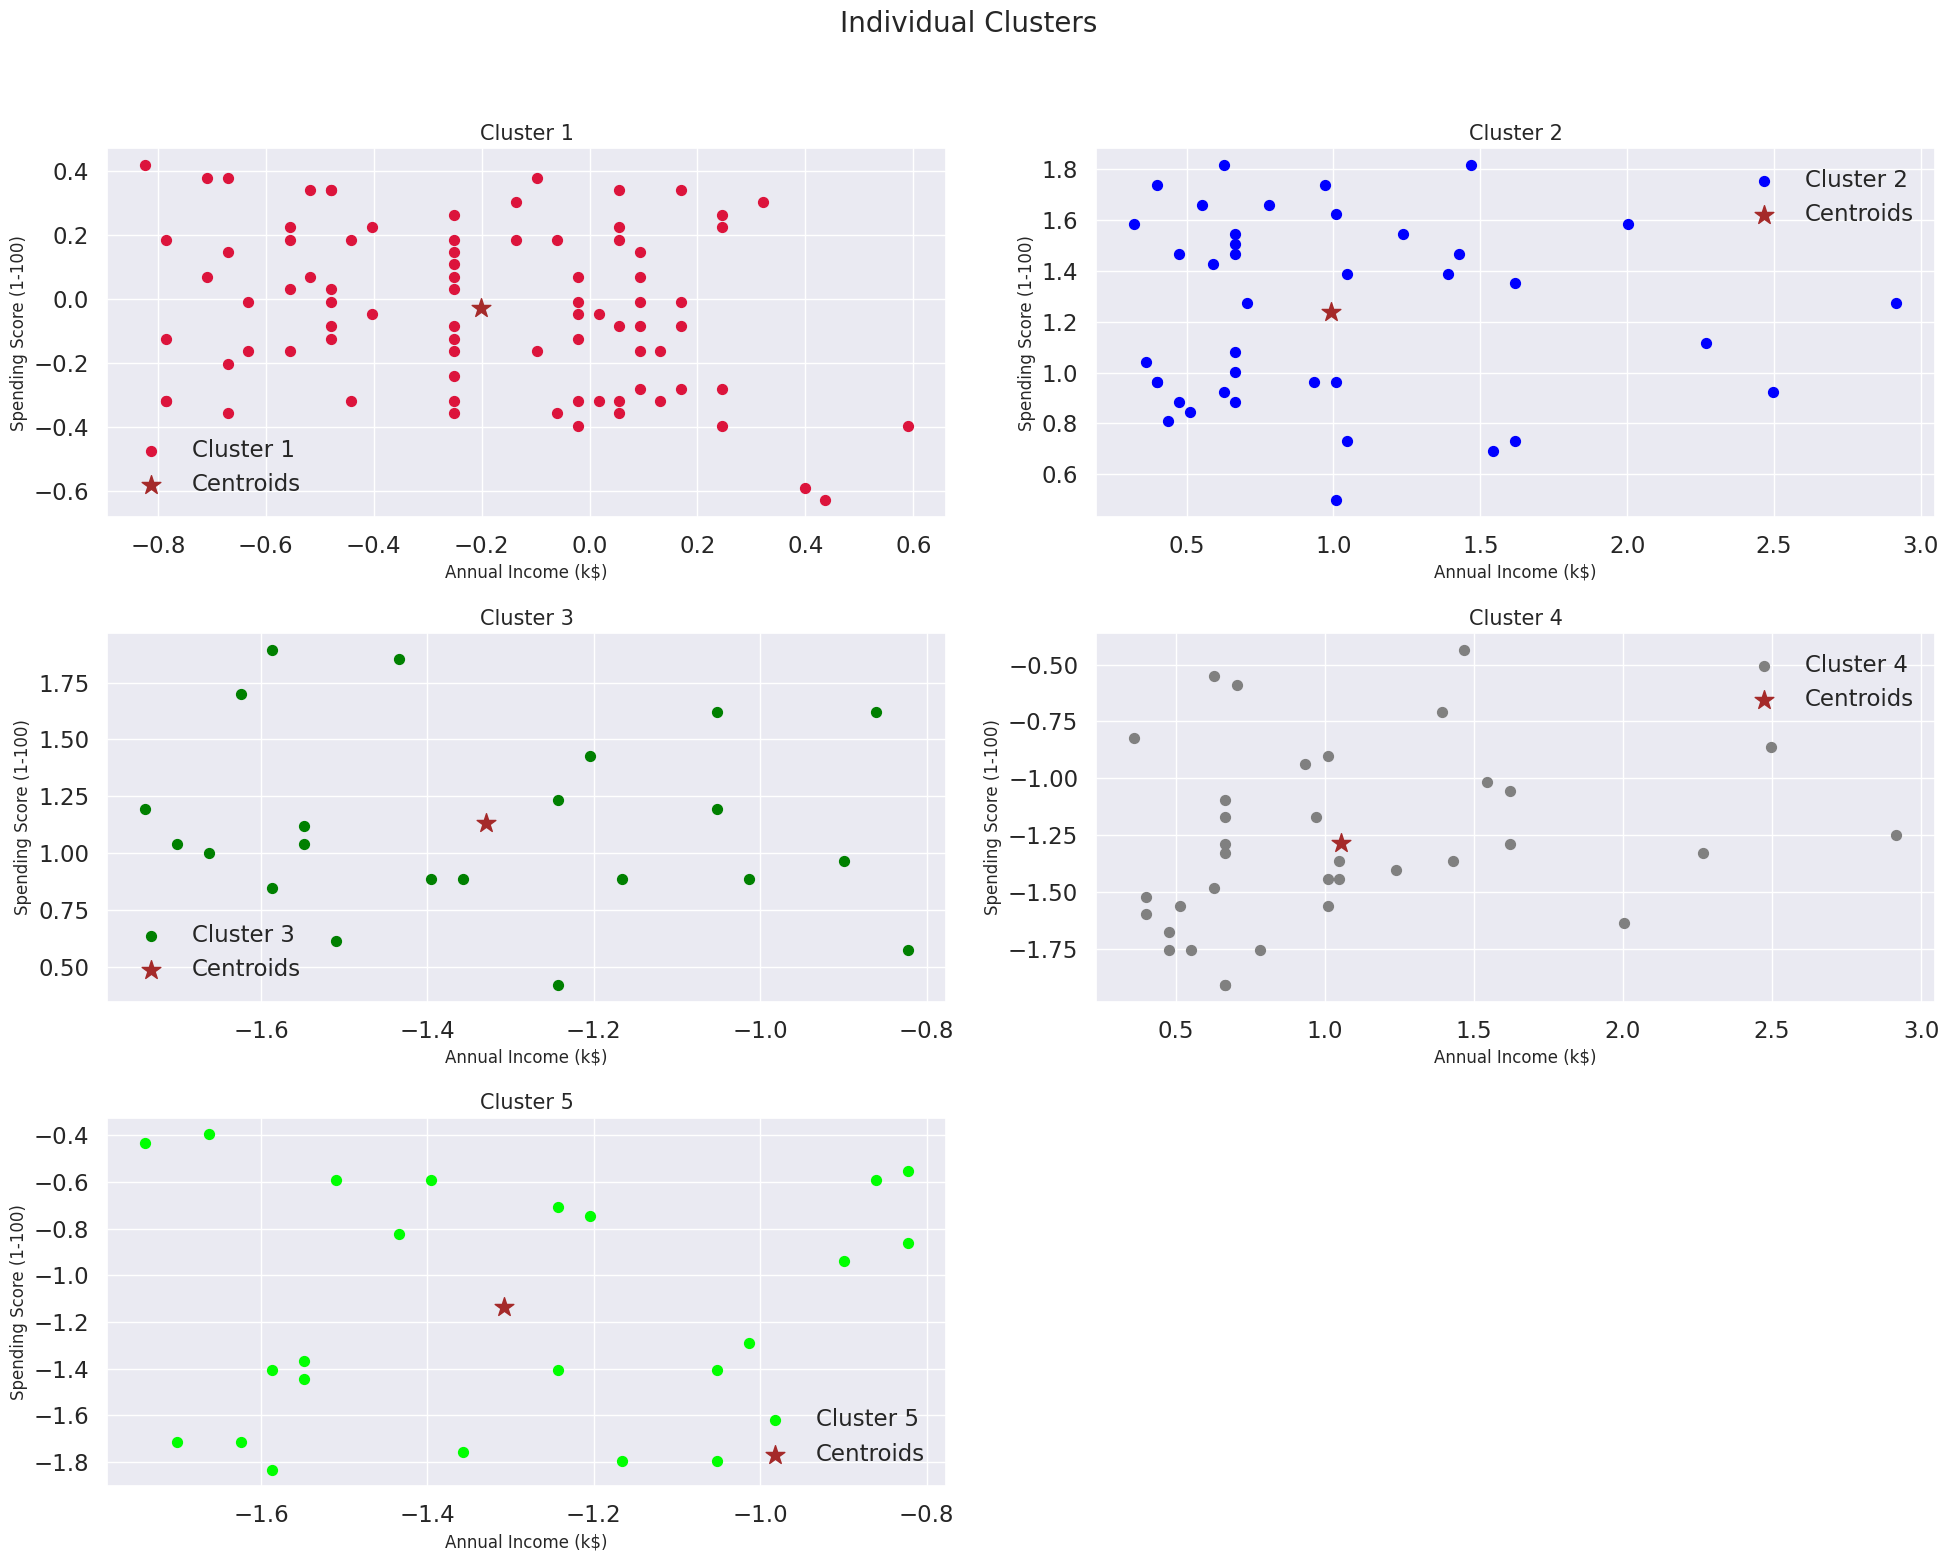

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(20, 16))
axs = axs.flatten()
colors = ['Crimson', 'blue', 'green', 'Gray', 'Lime']
cluster_titles = [f'Cluster {i+1}' for i in range(optimal_clusters)]

for i in range(optimal_clusters):
    axs[i].scatter(X_scaled[clusters == i, 0], X_scaled[clusters == i, 1], s=50, c=colors[i], label=cluster_titles[i])
    axs[i].scatter(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1], marker='*', s=200, c='brown', label='Centroids')
    axs[i].set_title(cluster_titles[i], fontsize=15)
    axs[i].set_xlabel('Annual Income (k$)', fontsize=12)
    axs[i].set_ylabel('Spending Score (1-100)', fontsize=12)
    axs[i].legend()

# Adjust layout
fig.delaxes(axs[5])  # remove extra subplot
plt.suptitle('Individual Clusters', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()